In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Rename Column names
# cb-Was the goal here to get rid of the PAY_0 and shorten the 'default.payment.next.month'?
data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'def_pay'}, inplace=True)

In [5]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [6]:
#Education Column -- combine 5,6,0, into 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
fill = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)
data.loc[fill, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [8]:
# Combine 0 and 3
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [9]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [10]:
#Explorign pay columns
data.PAY_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [11]:
#Everything 0 and under is considered ontime?
data.PAY_4.value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

In [12]:
#fill all pay columns 
fil = (data.PAY_1 == -2) | (data.PAY_1 == -1) | (data.PAY_1 == 0)
data.loc[fil, 'PAY_1'] = 0

In [13]:
fil = (data.PAY_2 == -2) | (data.PAY_2 == -1) | (data.PAY_2 == 0)
data.loc[fil, 'PAY_2'] = 0

In [14]:
fil = (data.PAY_3 == -2) | (data.PAY_3 == -1) | (data.PAY_3 == 0)
data.loc[fil, 'PAY_3'] = 0

In [15]:
fil = (data.PAY_4 == -2) | (data.PAY_4 == -1) | (data.PAY_4 == 0)
data.loc[fil, 'PAY_4'] = 0

In [16]:
fil = (data.PAY_5 == -2) | (data.PAY_5 == -1) | (data.PAY_5 == 0)
data.loc[fil, 'PAY_1'] = 0

In [17]:
fil = (data.PAY_6 == -2) | (data.PAY_6 == -1) | (data.PAY_6 == 0)
data.loc[fil, 'PAY_6'] = 0

In [18]:
data.PAY_6.value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [19]:
#no cleaning needed for Bill amount or pay amount

In [20]:
#dropping ID as it is just the row identifier
data=data.drop(columns=['ID'])

In [21]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,0,2,0,0,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,0,3,2,0,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,0,0,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [22]:
# To help identify categorical columns
for col in data.columns:
    print(col,'               ', len(data[col].unique()))

LIMIT_BAL                 81
SEX                 2
EDUCATION                 4
MARRIAGE                 3
AGE                 56
PAY_1                 9
PAY_2                 9
PAY_3                 9
PAY_4                 9
PAY_5                 10
PAY_6                 8
BILL_AMT1                 22723
BILL_AMT2                 22346
BILL_AMT3                 22026
BILL_AMT4                 21548
BILL_AMT5                 21010
BILL_AMT6                 20604
PAY_AMT1                 7943
PAY_AMT2                 7899
PAY_AMT3                 7518
PAY_AMT4                 6937
PAY_AMT5                 6897
PAY_AMT6                 6939
def_pay                 2


In [23]:
# At first glance: likelycategorical = ['sex', 'education', 'marriage', 'Pay_1:Pay:_6']

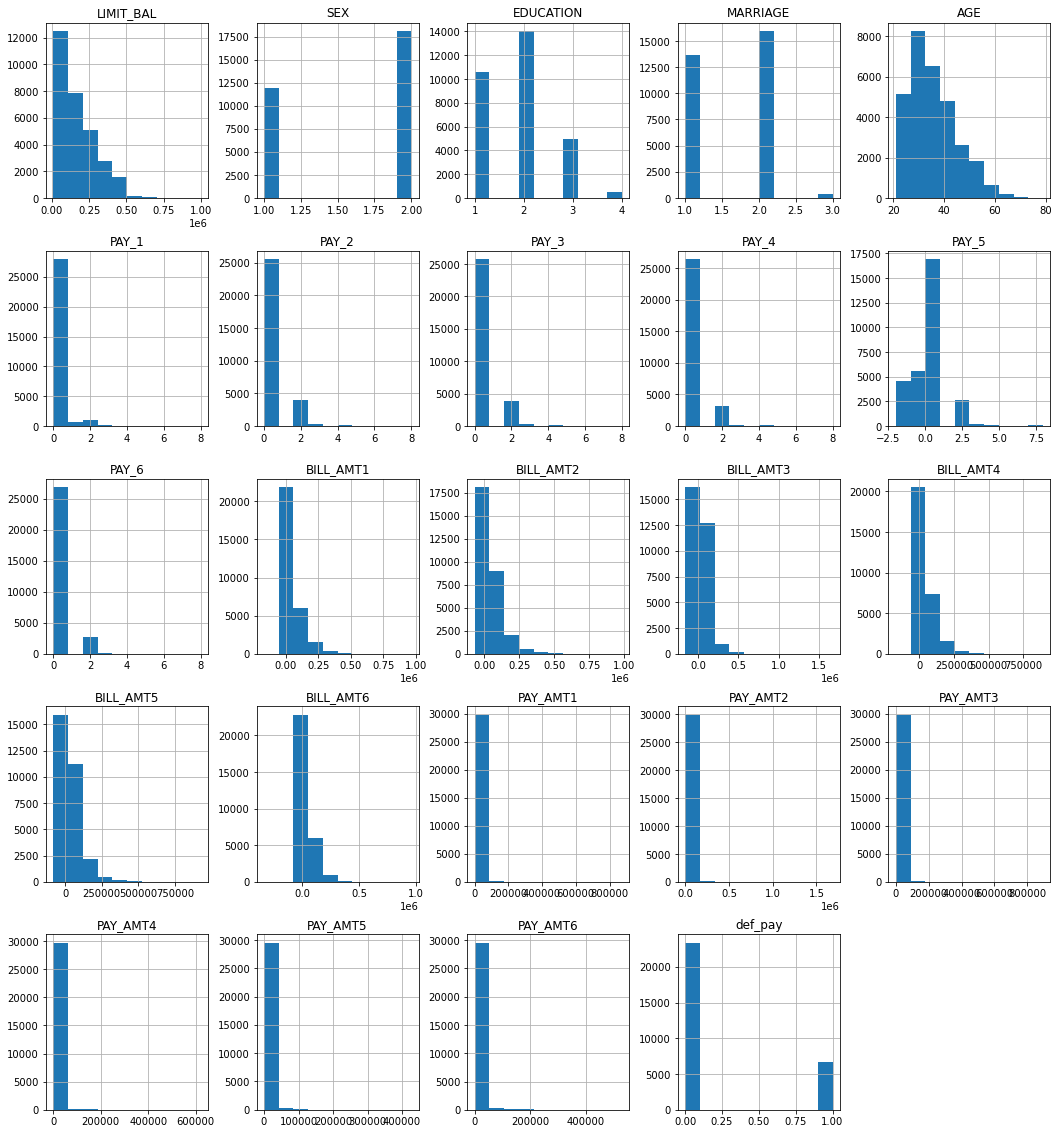

In [24]:
#Better identify categoricals
data.hist(figsize=(18,20));

## Logistic Regression

In [25]:
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

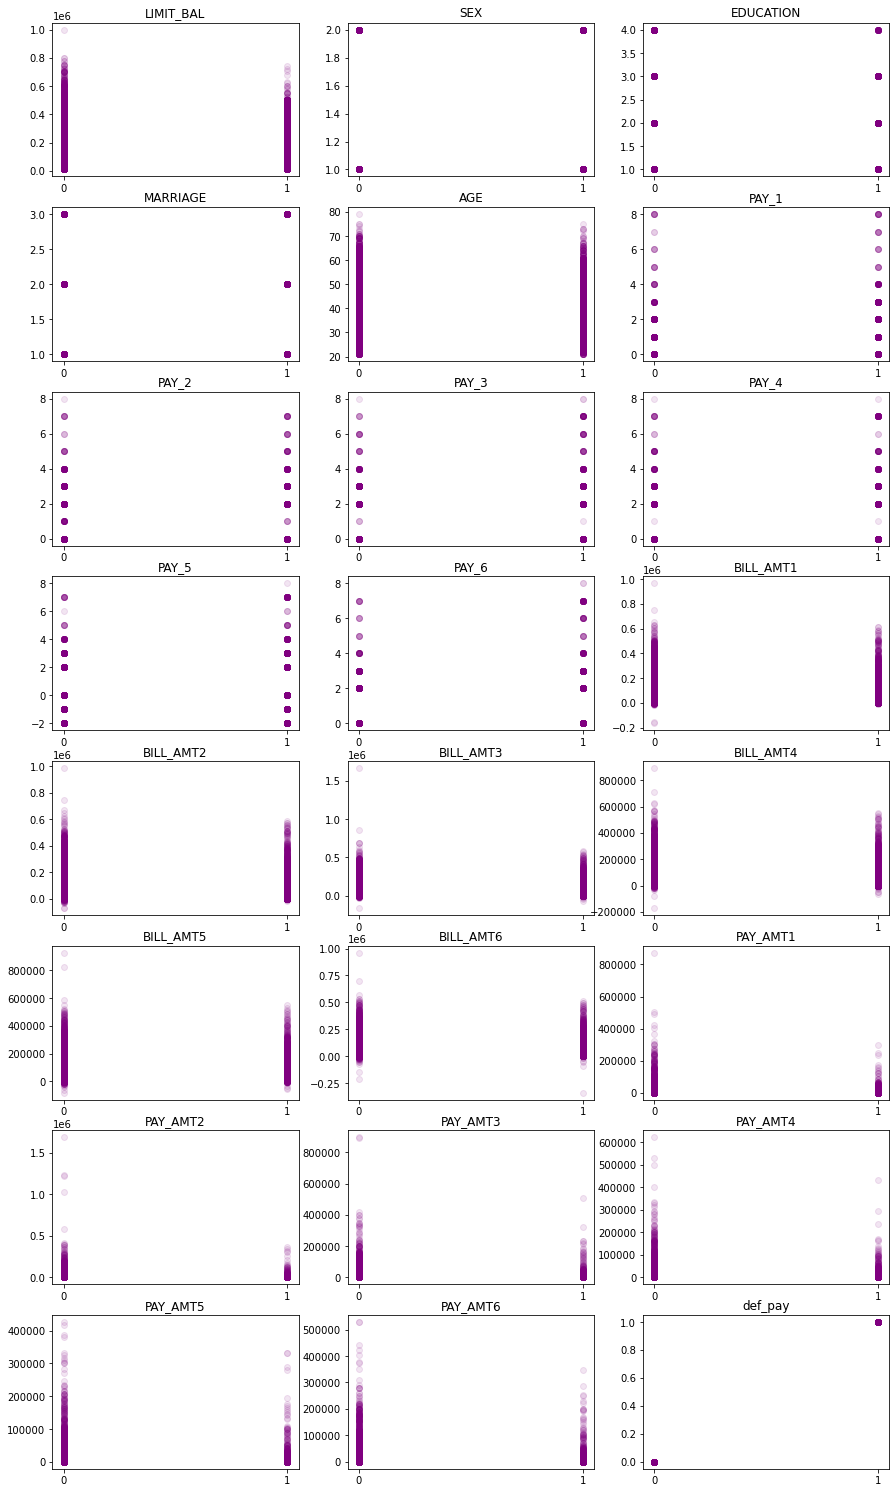

In [26]:
# Creating a large figure
fig = plt.figure(figsize=(15,30))

# Iterating over the different features for defaulting
for i in range(0, 24):
    # Figure number starts at 1
    ax = fig.add_subplot(9, 3, i+1)
    # Add a title to make it clear what each subplot shows
    plt.title(data.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter(data['def_pay'], data.iloc[:,i], c='purple', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(data.def_pay.unique())

In [27]:
#Defining X and Y

x = data.iloc[:,:-1]
y = data.def_pay
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

In [28]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='auto')
logreg.fit(x_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False)

In [29]:
y_hat_test = logreg.predict(x_test)
y_hat_train = logreg.predict(x_train)

In [30]:
y_hat_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
residuals = y_train == y_hat_train

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     18687
False     5313
Name: def_pay, dtype: int64


In [32]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted: 
True     4676
False    1324
Name: def_pay, dtype: int64


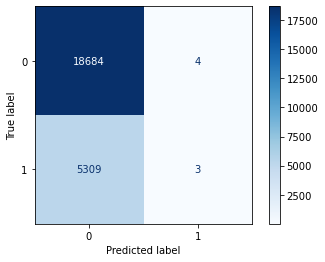

In [33]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg, x_train, y_train, cmap=plt.cm.Blues)

plt.show()

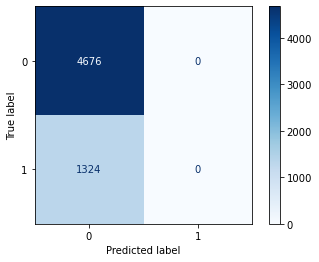

In [34]:
plot_confusion_matrix(logreg,x_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [35]:
from sklearn.metrics import classification_report

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     18688
           1       0.43      0.00      0.00      5312

    accuracy                           0.78     24000
   macro avg       0.60      0.50      0.44     24000
weighted avg       0.70      0.78      0.68     24000

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4676
           1       0.00      0.00      0.00      1324

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



In [36]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [37]:
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y, classes = [0, 1, 2])

y_bin_train, y_bin_test = train_test_split(y_bin, test_size=0.2, random_state=27)

In [38]:
#Scikit-learn's build in roc_curve method returns the fpr, tpr and thresholds
#for various decision boundaries given the case member probabilities

#First calculate the probability scores of each of the datapoints: 
y_score = logreg.fit(x_train, y_train).decision_function(x_test)

print(y_score)

[-6.78393121 -4.10905094 -0.29655816 ... -0.93615879 -0.47005698
 -0.57568777]


In [39]:
#Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _= roc_curve(y_bin_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red',])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area={1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0,1], [0,1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics for multi-class data')
plt.legend(loc="lower right")
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed